In [1]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pathlib import Path

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data.csv', index_col="date", infer_datetime_format=True, parse_dates=True)
df

totalArticles  daily_return  volume_change    spread       joy  \
date                                                                         
2020-10-31            5.0      0.007717       0.165422  0.041145  0.000000   
2020-11-01            1.0      0.017845      -0.183336  0.048242  0.000000   
2020-11-02            1.0     -0.003375      -0.564168  0.019277  0.000000   
2020-11-03            2.0     -0.014292       1.237562  0.045173  0.000000   
2020-11-04            1.0      0.033614      -0.021746  0.055851  0.000000   
...                   ...           ...            ...       ...       ...   
2021-01-14            1.0      0.098210      -0.044846  0.160705  0.000000   
2021-01-15           29.0      0.047111      -0.201092  0.091960  0.000000   
2021-01-16           25.0     -0.061602       0.285793  0.135861  0.000000   
2021-01-17           10.0     -0.019739      -0.344328  0.070903  0.599353   
2021-01-18            9.0     -0.005503       0.019845  0.083973  0.000000   

            fear   sadness  tentative  analytical  confident  anger  \
date                                                                  
2020-10-31   0.0  0.000000   0.668336    0.000000        0.0    0.0   
2020-11-01   0.0  0.576203   0.000000    0.000000        0.0    0.0   
2020-11-02   0.0  0.000000   0.672523    0.000000        0.0    0.0   
2020-11-03   0.0  0.000000   0.000000    0.000000        0.0    0.0   
2020-11-04   0.0  0.000000   0.000000    0.822162        0.0    0.0   
...          ...       ...        ...         ...        ...    ...   
2021-01-14   0.0  0.000000   0.000000    0.000000        0.0    0.0   
2021-01-15   0.0  0.000000   0.000000    0.000000        0.0    0.0   
2021-01-16   0.0  0.596336   0.649689    0.610558        0.0    0.0   
2021-01-17   0.0  0.597262   0.000000    0.000000        0.0    0.0   
2021-01-18   0.0  0.571201   0.000000    0.000000        0.0    0.0   

            crossover_signal  vol_trend_signal  bollinger_signal    close  \
date                                                                        
2020-10-31               1.0              -1.0              -1.0  13567.0   
2020-11-01               1.0               1.0              -1.0  13809.1   
2020-11-02               1.0               1.0              -1.0  13762.5   
2020-11-03               1.0               1.0              -1.0  13565.8   
2020-11-04               1.0              -1.0              -1.0  14021.8   
...                      ...               ...               ...      ...   
2021-01-14               1.0              -1.0              -1.0  37390.1   
2021-01-15               1.0              -1.0              -1.0  39151.6   
2021-01-16               1.0              -1.0               0.0  36739.8   
2021-01-17               1.0              -1.0               0.0  36014.6   
2021-01-18               1.0               1.0               0.0  35816.4   

            positive_return  
date                         
2020-10-31              1.0  
2020-11-01              0.0  
2020-11-02              0.0  
2020-11-03              1.0  
2020-11-04              1.0  
...                     ...  
2021-01-14              1.0  
2021-01-15              0.0  
2021-01-16              0.0  
2021-01-17              0.0  
2021-01-18              1.0  

[89 rows x 16 columns]

In [4]:
 # Creating the X and y sets
X = df.iloc[:, 0:15].values
y = df["positive_return"].values

In [5]:
# Import the StandardScaler from sklearn
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [6]:
# Creating training, validation, and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=78)

In [7]:
# Import Keras modules for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
# Model set-up
number_input_features = 15
hidden_nodes_layer1 = 20
hidden_nodes_layer2 = 15
hidden_nodes_layer3 = 10
hidden_nodes_layer4 = 5

In [9]:
# Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Layer 2
model.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Layer 3
model.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Layer 4 
model.add(Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
model.add(Dense(1, activation="sigmoid"))

In [10]:
# Compile the model
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

In [11]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6         
Total params: 856
Trainable params: 856
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Training the model
batch_size = 1000
epochs = 100
model_training = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/100
1/1 [==============================] - 6s 6s/step - loss: 0.7039 - accuracy: 0.3878 - tp: 0.0000e+00 - tn: 19.0000 - fp: 1.0000 - fn: 29.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4371 - val_loss: 0.7173 - val_accuracy: 0.3529 - val_tp: 1.0000 - val_tn: 5.0000 - val_fp: 0.0000e+00 - val_fn: 11.0000 - val_precision: 1.0000 - val_recall: 0.0833 - val_auc: 0.5667
Epoch 2/100
1/1 [==============================] - 0s 83ms/step - loss: 0.7013 - accuracy: 0.3878 - tp: 0.0000e+00 - tn: 19.0000 - fp: 1.0000 - fn: 29.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4448 - val_loss: 0.7148 - val_accuracy: 0.3529 - val_tp: 1.0000 - val_tn: 5.0000 - val_fp: 0.0000e+00 - val_fn: 11.0000 - val_precision: 1.0000 - val_recall: 0.0833 - val_auc: 0.5750
Epoch 3/100
1/1 [==============================] - 0s 77ms/step - loss: 0.6991 - accuracy: 0.3878 - tp: 0.0000e+00 - tn: 19.0000 - fp: 1.0000 - fn: 29.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4845 -

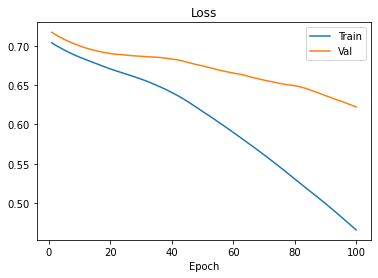

In [13]:
 # Plotting loss
loss_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": model_training.history["loss"],
        "Val": model_training.history["val_loss"],
    }
)
loss_df.set_index("Epoch", inplace=True)
loss_df.plot(title="Loss")

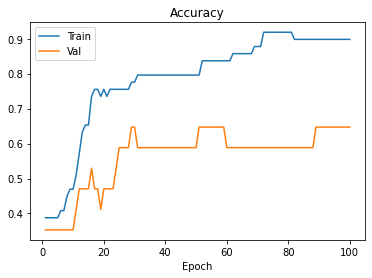

In [14]:
# Plotting accuracy
accuracy_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": model_training.history["accuracy"],
        "Val": model_training.history["val_accuracy"],
    }
)
accuracy_df.set_index("Epoch", inplace=True)
accuracy_df.plot(title="Accuracy")

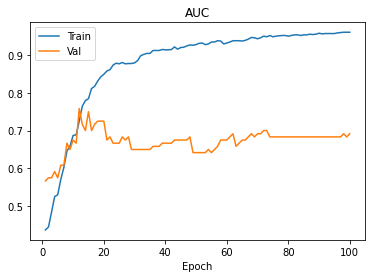

In [15]:
 # Plotting AUC
auc_df = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": model_training.history["auc"],
        "Val": model_training.history["val_auc"],
    }
)
auc_df.set_index("Epoch", inplace=True)
auc_df.plot(title="AUC")

In [16]:
# Evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

# Define metrics dictionary
metrics = {k: v for k, v in zip(model.metrics_names, scores)}

# Display evaluation metrics results
display(metrics)

{'loss': 0.7269207239151001,
 'accuracy': 0.5652173757553101,
 'tp': 11.0,
 'tn': 2.0,
 'fp': 6.0,
 'fn': 4.0,
 'precision': 0.6470588445663452,
 'recall': 0.7333333492279053,
 'auc': 0.5249999761581421}

In [17]:
 # Define the confusion matrix data
cm_df = pd.DataFrame(
    {
        "Positive (1)": [f"TP={metrics['tp']}", f"FP={metrics['fn']}"],
        "Negative (0)": [f"FN={metrics['fp']}", f"TN={metrics['tn']}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
cm_df.index.name = "Actual"
cm_df.columns.name = "Predicted"

# Show the confusion matrix
cm_df

Predicted   Positive (1) Negative (0)
Actual                               
Positive(1)      TP=11.0       FN=6.0
Negative(0)       FP=4.0       TN=2.0

In [18]:
# Import the classification_report method from sklearn
from sklearn.metrics import classification_report

# Predict classes using testing data
y_predict_classes = model.predict_classes(X_test, batch_size=1000)

# Display classification report
print(classification_report(y_predict_classes, y_test))

              precision    recall  f1-score   support

           0       0.25      0.33      0.29         6
           1       0.73      0.65      0.69        17

    accuracy                           0.57        23
   macro avg       0.49      0.49      0.49        23
weighted avg       0.61      0.57      0.58        23



In [19]:
# Define the LSTM RNN model
model_2 = Sequential()

# Layer 1
model_2.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Layer 2
model_2.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Layer 3
model_2.add(Dense(units=hidden_nodes_layer3, activation="relu"))

# Layer 4 
model_2.add(Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
model_2.add(Dense(1, activation="sigmoid"))

In [20]:
# Compile the model
model_2.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=[
        "accuracy",
        tf.keras.metrics.TruePositives(name="tp"),
        tf.keras.metrics.TrueNegatives(name="tn"),
        tf.keras.metrics.FalsePositives(name="fp"),
        tf.keras.metrics.FalseNegatives(name="fn"),
        tf.keras.metrics.Precision(name="precision"),
        tf.keras.metrics.Recall(name="recall"),
        tf.keras.metrics.AUC(name="auc"),
    ],
)

In [21]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 20)                320       
_________________________________________________________________
dense_6 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
Total params: 856
Trainable params: 856
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Training the model
batch_size = 1000
epochs = 1000
model_training_2 = model_2.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 0.8052 - accuracy: 0.4082 - tp: 0.0000e+00 - tn: 20.0000 - fp: 0.0000e+00 - fn: 29.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5655 - val_loss: 0.8472 - val_accuracy: 0.2941 - val_tp: 0.0000e+00 - val_tn: 5.0000 - val_fp: 0.0000e+00 - val_fn: 12.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6583
Epoch 2/1000
1/1 [==============================] - 0s 75ms/step - loss: 0.7980 - accuracy: 0.4082 - tp: 0.0000e+00 - tn: 20.0000 - fp: 0.0000e+00 - fn: 29.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5733 - val_loss: 0.8391 - val_accuracy: 0.2941 - val_tp: 0.0000e+00 - val_tn: 5.0000 - val_fp: 0.0000e+00 - val_fn: 12.0000 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.6583
Epoch 3/1000
1/1 [==============================] - 0s 71ms/step - loss: 0.7912 - accuracy: 0.4082 - tp: 0.0000e+00 - tn: 20.0000 - fp: 0.0000e+00 - fn: 29.0000 - precision: 0.0000e+

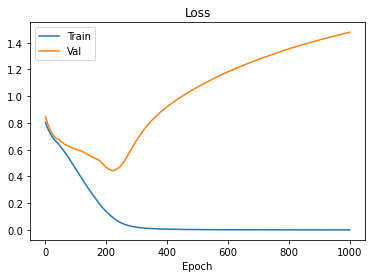

In [23]:
 # Plotting loss
loss_df_2 = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": model_training_2.history["loss"],
        "Val": model_training_2.history["val_loss"],
    }
)
loss_df_2.set_index("Epoch", inplace=True)
loss_df_2.plot(title="Loss")

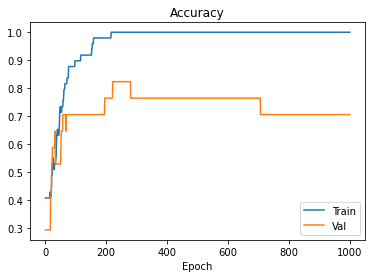

In [24]:
# Plotting accuracy
accuracy_df_2 = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": model_training_2.history["accuracy"],
        "Val": model_training_2.history["val_accuracy"],
    }
)
accuracy_df_2.set_index("Epoch", inplace=True)
accuracy_df_2.plot(title="Accuracy")

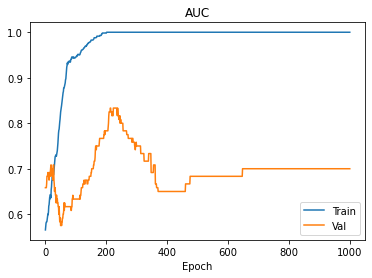

In [25]:
 # Plotting AUC
auc_df_2 = pd.DataFrame(
    {
        "Epoch": range(1, epochs + 1),
        "Train": model_training_2.history["auc"],
        "Val": model_training_2.history["val_auc"],
    }
)
auc_df_2.set_index("Epoch", inplace=True)
auc_df_2.plot(title="AUC")

In [26]:
scores_2 = model_2.evaluate(X_test, y_test, verbose=0)

# Define metrics dictionary
metrics_2 = {k: v for k, v in zip(model_2.metrics_names, scores_2)}

# Display evaluation metrics results
display(metrics_2)

{'loss': 3.2970283031463623,
 'accuracy': 0.3478260934352875,
 'tp': 6.0,
 'tn': 2.0,
 'fp': 6.0,
 'fn': 9.0,
 'precision': 0.5,
 'recall': 0.4000000059604645,
 'auc': 0.3541666865348816}

In [27]:
 # Define the confusion matrix data
cm_df_2 = pd.DataFrame(
    {
        "Positive (1)": [f"TP={metrics_2['tp']}", f"FP={metrics_2['fn']}"],
        "Negative (0)": [f"FN={metrics_2['fp']}", f"TN={metrics_2['tn']}"],
    },
    index=["Positive(1)", "Negative(0)"],
)
cm_df_2.index.name = "Actual"
cm_df_2.columns.name = "Predicted"

# Show the confusion matrix
cm_df_2

Predicted   Positive (1) Negative (0)
Actual                               
Positive(1)       TP=6.0       FN=6.0
Negative(0)       FP=9.0       TN=2.0

In [31]:
# Import the classification_report method from sklearn
from sklearn.metrics import classification_report

# Predict classes using testing data
y_predict_classes_2 = model_2.predict_classes(X_test, batch_size=1000)

# Display classification report
print(classification_report(y_predict_classes_2, y_test))

              precision    recall  f1-score   support

           0       0.25      0.18      0.21        11
           1       0.40      0.50      0.44        12

    accuracy                           0.35        23
   macro avg       0.33      0.34      0.33        23
weighted avg       0.33      0.35      0.33        23

